큐는 선입선출(First in First out) 구조입니다.

- 인큐(enque): 데이터를 추가하는 작업
- 디큐(deque): 데이터를 꺼내는 작업
- 프런트(front): 데이터를 꺼내는 쪽
- 리어(rear): 데이터를 넣는 쪽

#### 우선순위 큐

우선순위 큐(priority queue)는 인큐할 때 데이터에 우선순위를 부여하여 추가하고, 디큐할 때 우선순위가 가장 높은 데이터를 꺼내는 방식입니다. 파이썬에서 우선순위를 부여하는 큐는 heapq 모듈에서 제공합니다. heap에서 data의 인큐는 heapq.heappush(heap, data)로 수행하고, 디큐는 heapq.heappop(head)으로 수행합니다. heapq 모듈을 사용한 프로그램은 6장에서 다룹니다.

## 링 버퍼로 큐 구현하기

디큐할 때 배열 안으로 원소를 옮기지 않는 큐를 구현하겠습니다. 이럴 때 사용하는 자료구조가 링 버퍼(ring buffer)입니다. 링 버퍼는 배열
맨 끝의 원소 뒤에 맨 앞의 원소가 연결되는 자료구조입니다. 어떤 원소가 맨 앞 원소이고, 어떤 원소가 맨 끝 원소인지 식별하는 변수가 각각
front와 rear입니다. 여기에서 front와 rear는 논리적인 데이터 순서일 뿐 배열의 물리적 원소의 순서는 아닙니다.
모든 처리의 시간 복잡도는 O(1)입니다.

In [2]:
# 고정 길이 큐 클래스 FixedQueue 구현하기

from typing import Any

class FixedQueue:
    
    class Empty(Exception):
        """비어 있는 FixedQueue에서 디큐 또는 피크할 때 내보내는 예외 처리"""
        pass
    
    class Full(Exception):
        """가득 차 있는 FixedQueue에서 인큐할 때 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int) -> None:
        """큐 초기화"""
        self.no = 0                     # 현재 데이터 개수
        self.front = 0                  # 맨 앞 원소 커서
        self.rear = 0                   # 맨 뒤 원소 커서
        self.capacity = capacity        # 큐의 크기
        self.que = [None] * capacity    # 큐의 본체
        
    def __len__(self) -> int:
        """큐에 있는 모든 데이터 개수를 반환"""
        return self.no
    
    def is_empty(self) -> bool:
        """큐가 비어 있는지 판단"""
        return self.no <= 0
    
    def is_full(self) -> bool:
        """큐가 가득 차 있는지 판단"""
        return self.no >= self.capacity
    
    def enque(self, x: Any) -> None:
        """데이터 x를 인큐"""
        if self.is_full():
            raise FixedQueue.Full   # 큐가 가득 차 있는 경우 예외 처리 발생
        self.que[self.rear] = x
        self.rear += 1
        self.no += 1
        if self.rear == self.capacity:
            self.rear = 0
    
    def deque(self) -> Any:
        """데이터를 디큐"""
        if self.is_empty():
            raise FixedQueue.Empty   # 큐가 비어 있는 경우 예외 처리 발생
        x = self.que[self.front]
        self.front += 1
        self.no -= 1
        if self.front == self.capacity:
            self.front = 0
        return x
    
    def peek(self) -> Any:
        """큐에서 데이터를 피크(맨 앞 데이터를 들여다봄)"""
        if self.is_empty():
            raise FixedQueue.Empty        # 큐가 비어 있는 경우 예외 처리 발생
        return self.que[self.front]
    
    def find(self, value: Any) -> Any:
        """큐에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
        for i in range(self.no):
            idx = (i + self.front) % self.capacity
            if self.que[idx] == value:    # 검색 성공
                return idx
        return -1                        # 검색 실패 
    
    def count(self, value: Any) -> bool:
        """큐에 있는 value의 개수를 반환"""
        c = 0
        for i in range(self.no):          # 큐 데이터를 선형 검색
            idx = (i + self.front) % self.capacity
            if self.que[idx] == value:    # 검색 성공
                c += 1                    # 들어 있음
        return c
    
    def __contains__(self, value: Any) -> bool:
        """큐에 value가 있는지 판단"""
        return self.count(value)
    
    def clear(self) -> None:
        """큐의 모든 데이터를 비움"""
        self.no = self.front = self.rear = 0
        
    def dump(self) -> None:
        """모든 데이터를 맨 앞부터 맨 끝 순으로 출력"""
        if self.is_empty():
            print('큐가 비었습니다.')
        else:
            for i in range(self.no):
                print(self.que[(i + self.front) % self.capacity], end = '')
            print()

- que: 큐의 배열로써 밀어 넣는 데이터를 저장하는 list형 배열입니다.
- capacity: 큐의 최대 크기를 나타내는 int형 정수입니다. 이 값은 배열 que의 원소 수와 일치합니다.
- front, rear: 맨 앞의 원소, 맨 끝의 원소를 나타내는 인덱스입니다. 큐에 넣은 데이터 중에 가장 처음에 넣은 맨 앞 원소의 인덱스가
front이고, 가장 마지막에 넣은 맨 끝 원소의 바로 다음 인덱스가 rear입니다. rear는 다음에 인큐할 때 데이터를 저장하는 원소의 인덱스입니다.
- no: 큐에 쌓여 있는 데이터 개수를 나타내는 int형 정수입니다. 변수 front와 rear의 값이 같은 경우 큐가 비어 있는지 또는 가득 차 있는지
구별하기 위해 필요합니다. 큐가 비어 있는 경우에는 no가 0이 되고, 가득 차 있는 경우에는 capacity와 같은 값이 됩니다.

#### 양방향 대기열 덱의 구조

양방향 대기열인 덱은 맨 앞과 맨 끝 양쪽에서 데이터를 넣고 꺼낼 수 있는 자료구조입니다. 파이썬에서는 collections.deque 컨테이너로 제공됩니다.

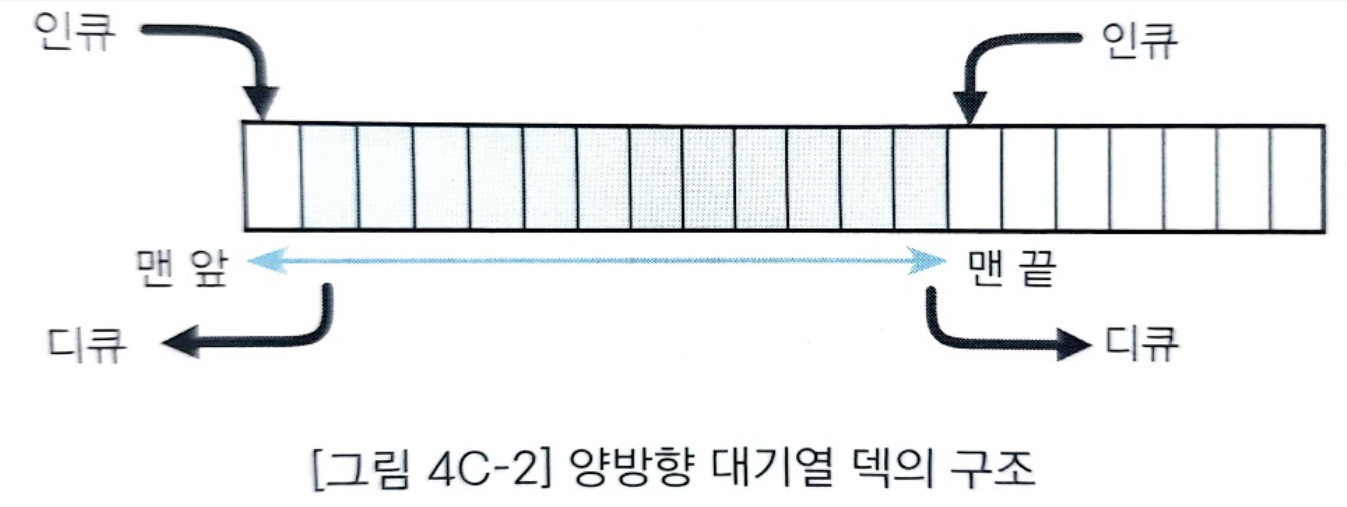

#### 덱이란?

덱(deque: double-ended queue)은 맨 앞과 맨 끝 양쪽에서 데이터를 모두 삽입, 삭제할 수 있는 자료 구조입니다. 2개의 포인터를 사용하여
양쪽에서 삭제, 삽입을 할 수 있으며, 큐와 스택을 합친 형태라고 생각하면 됩니다.

In [ ]:
# 고정 길이 큐 클래스(FixedQueue)를 사용하기

from enum import Enum
from fixed_queue import FixedQueue

Menu = Enum('Menu', ['인큐', '디큐', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='   ', end='')
        n = int(input(': '))
        if 1 <= n <= len(Menu):
            return Menu(n)

q = FixedQueue(64)  # 최대 64개를 인큐할 수 있는 큐 생성(고정 길이)

while True:
    print(f'현재 데이터 개수: {len(q)} / {q.capacity}')
    menu = select_menu()   # 메뉴 선택

    if menu == Menu.인큐:  # 인큐
        x = int(input('인큐할 데이터를 입력하세요.: '))
        try:
            q.enque(x)
        except FixedQueue.Full:
            print('큐가 가득 찼습니다.')

    elif menu == Menu.디큐:  # 디큐
        try:
            x = q.deque()
            print(f'디큐한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비어 있습니다.')

    elif menu == Menu.피크:  # 피크
        try:
            x = q.peek()
            print(f'피크한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print('큐가 비었습니다.')

    elif menu == Menu.검색:  # 검색
        x = int(input('검색할 값을 입력하세요.: '))
        if x in q:
            print(f'{q.count(x)}개 포함되고, 맨 앞의 위치는 {q.find(x)}입니다.')
        else:
            print('검색값을 찾을 수 없습니다.')

    elif menu == Menu.덤프:  # 덤프
        q.dump()
    else:
        break

In [5]:
# 원하는 개수(n)만큼 값을 입력받아 마지막 n개를 저장

n = int(input('정수를 몇 개 저장할까요?: '))
a = [None] * n                # 입력받은 값을 저장하는 배열

cnt = 0                       # 정수를 입력받은 개수
while True:
    a[cnt % n] = int(input((f'{cnt + 1}번째 정수를 입력하세요.: ')))
    cnt += 1
    
    retry = input(f'계속 할까요?(Y ... Yes / N ... No): ')
    if retry in {'N', 'n'}:
        break
        
i = cnt - n
if i < 0: i = 0
    
while i < cnt:
    print(f'{i + 1}번째 = {a[i % n]}')
    i += 1

정수를 몇 개 저장할까요?: 12
1번째 정수를 입력하세요.: 15
계속 할까요?(Y ... Yes / N ... No): y
2번째 정수를 입력하세요.: 124
계속 할까요?(Y ... Yes / N ... No): y
3번째 정수를 입력하세요.: 125
계속 할까요?(Y ... Yes / N ... No): 12
4번째 정수를 입력하세요.: 6
계속 할까요?(Y ... Yes / N ... No): 7
5번째 정수를 입력하세요.: 3
계속 할까요?(Y ... Yes / N ... No): 8
6번째 정수를 입력하세요.: 23
계속 할까요?(Y ... Yes / N ... No): 3
7번째 정수를 입력하세요.: 6
계속 할까요?(Y ... Yes / N ... No): 32
8번째 정수를 입력하세요.: 6
계속 할까요?(Y ... Yes / N ... No): 2
9번째 정수를 입력하세요.: 73
계속 할까요?(Y ... Yes / N ... No): 32
10번째 정수를 입력하세요.: 2
계속 할까요?(Y ... Yes / N ... No): 31
11번째 정수를 입력하세요.: 36
계속 할까요?(Y ... Yes / N ... No): 11
12번째 정수를 입력하세요.: 313
계속 할까요?(Y ... Yes / N ... No): 3
13번째 정수를 입력하세요.: 316
계속 할까요?(Y ... Yes / N ... No): N
2번째 = 124
3번째 = 125
4번째 = 6
5번째 = 3
6번째 = 23
7번째 = 6
8번째 = 6
9번째 = 73
10번째 = 2
11번째 = 36
12번째 = 313
13번째 = 316
